In [1]:
import numpy as np
import pandas as pd
from knn_numpy import *
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#Reading dataset
banknote_dataset = pd.read_csv("data_banknote_authentication.csv")

In [3]:
banknote_dataset.head()

,Variance,Skewness,Cutosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Data preprocessing

## Getting Feautres and labels (classes)

In [4]:
features = banknote_dataset.iloc[:,:-1].values
labels = banknote_dataset.iloc[:, -1].values

In [5]:
print(features)
print()
print(labels)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]

[0 0 0 ... 1 1 1]


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [13]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1097, 4)
X_test shape: (275, 4)
y_train shape: (1097,)
y_test shape: (275,)


## Scale data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

# Prediction

## (Optional) Predicition using custom KNN

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [18]:
custom_knn = KNeighborsClassifieR()

In [19]:
custom_knn.fit(X_train, y_train)
pred = custom_knn.predict(X_test)
print('Custom knn accuracy: ', accuracy(pred, y_test))

Custom knn accuracy:  100.0


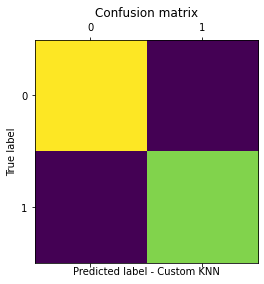

[[152   0]
 [  0 123]]


In [20]:
cm_custom = confusion_matrix(y_test, pred)

plt.matshow(cm_custom)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label - Custom KNN')
plt.show()
print(cm_custom)

## Prediction using Sklearn KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
sklearn_knn = KNeighborsClassifier()

In [23]:
sklearn_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
pred_sklearn = sklearn_knn.predict(X_test)
print("Sklearn knn accuracy: ", accuracy(pred_sklearn, y_test))

Sklearn knn accuracy:  100.0


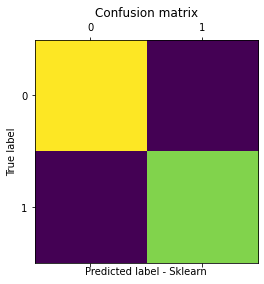

[[152   0]
 [  0 123]]


In [25]:
cm_sklearn = confusion_matrix(y_test, pred_sklearn)
plt.matshow(cm_sklearn)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label - Sklearn')
plt.show()
print(cm_sklearn)